In [378]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [379]:
#定义数据集规模
size = 200
#生成数据集(符合正态分布)
dataA = np.random.normal((3,1.5),0.6,(size,2))
dataA = np.hstack([np.zeros(shape=(len(dataA),1)),dataA])
dataB = np.random.normal((8,4),0.6,(size,2))
dataB = np.hstack([np.ones(shape=(len(dataB),1)),dataB])
data_output = np.vstack((dataA,dataB))
np.random.shuffle(data_output)
x = data_output[0:400,[1,2]]
y = data_output[0:400,[0]]


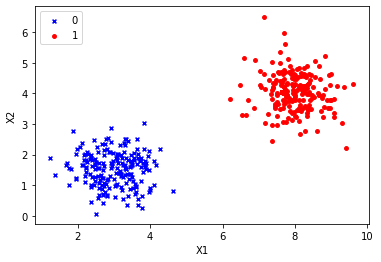

In [380]:
##数据集可视化
label = np.array(y)
index_0 = np.where(label==0)
plt.scatter(x[index_0,0],x[index_0,1],marker='x',color = 'b',label = '0',s = 15)
index_1 =np.where(label==1)
plt.scatter(x[index_1,0],x[index_1,1],marker='o',color = 'r',label = '1',s = 15)
 
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper left')
plt.show()


In [381]:
class logistic(object):
    def __init__(self):
        self.w = None
    
    
    def train(self,x,y,learn_rate = 0.01,num_iters = 10000):
        num_train,num_feature = x.shape
        self.w = 0.001*np.random.randn(num_feature,1).reshape((-1,1))
        loss = []
        
        for i in range(num_iters):
            error,dw = self.compute_loss(x,y)
            self.w += -learn_rate*dw
            
            loss.append(error)
            if i%200==0:
                print('i=%d,error=%f' %(i,error))           


        return loss
    
    
    def compute_loss(self,x,y):
        num_train = x.shape[0]
        h = self.output(x)
        loss = -np.sum((y*np.log(h) + (1-y)*np.log((1-h))))
        loss = loss / num_train
        
        dw = x.T.dot((h-y)) / num_train
    
        return loss,dw
    
    def output(self,x):
        g = np.dot(x,self.w)
        return self.sigmod(g)
    
    def sigmod(self,x):
        return 1/(1+np.exp(-x))
    
    def predict(self,x_test):
        h = self.output(x_test)
        y_pred = np.where(h>=0.5,1,0)
        return y_pred


i=0,error=0.693356
i=200,error=0.542043
i=400,error=0.486217
i=600,error=0.438667
i=800,error=0.398067
i=1000,error=0.363263
i=1200,error=0.333281
i=1400,error=0.307312
i=1600,error=0.284692
i=1800,error=0.264875
i=2000,error=0.247417
i=2200,error=0.231954
i=2400,error=0.218187
i=2600,error=0.205869
i=2800,error=0.194796
i=3000,error=0.184799
i=3200,error=0.175736
i=3400,error=0.167488
i=3600,error=0.159955
i=3800,error=0.153051
i=4000,error=0.146704
i=4200,error=0.140850
i=4400,error=0.135437
i=4600,error=0.130418
i=4800,error=0.125753
i=5000,error=0.121406
i=5200,error=0.117347
i=5400,error=0.113548
i=5600,error=0.109987
i=5800,error=0.106642
i=6000,error=0.103494
i=6200,error=0.100526
i=6400,error=0.097724
i=6600,error=0.095075
i=6800,error=0.092566
i=7000,error=0.090188
i=7200,error=0.087929
i=7400,error=0.085781
i=7600,error=0.083737
i=7800,error=0.081789
i=8000,error=0.079931
i=8200,error=0.078157
i=8400,error=0.076460
i=8600,error=0.074837
i=8800,error=0.073282
i=9000,error=0.07

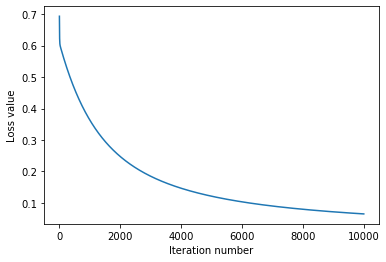

In [382]:
##训练数据
y = y.reshape((-1,1))
one = np.ones((x.shape[0],1))
x_train = np.hstack((one,x))
classify = logistic()
loss = classify.train(x_train,y)
print(classify.w)
 
plt.plot(loss)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
 
plt.show()


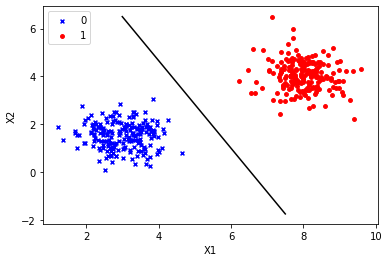

In [383]:
label = np.array(y)
index_0 = np.where(label==0)
plt.scatter(x[index_0,0],x[index_0,1],marker='x',color = 'b',label = '0',s = 15)
index_1 =np.where(label==1)
plt.scatter(x[index_1,0],x[index_1,1],marker='o',color = 'r',label = '1',s = 15)
 
#边界线
x1 = np.arange(3,8,0.5)
x2 = (- classify.w[0] - classify.w[1]*x1) / classify.w[2]
plt.plot(x1,x2,color = 'black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper left')
plt.show()
